In [1]:
import numpy as np
from splinv import detect
from splinv import hmod
from splinv import darkmapper
from splinv.grid import Cartesian
from configparser import ConfigParser
import splinv
import time


Check if halo itself accounts for difference in different length scale in redshifts. 

In [2]:
""" Test sparse reconstruction of weak lensing dark map
"""
# configuration
configName  =   'simulator.ini'
parser      =   ConfigParser()
parser.read(configName)

# halo simulation
z_h1     =  0.2425
log_m1   =  15.0
M_200_1   =  10.**(log_m1)

conc    =  4.
# halo1    =  hmod.triaxialJS02(mass=M_200_1,conc=conc,redshift=z_h1,ra=0.,dec=0,a_over_c=0.5,a_over_b=1, tri_nfw = True, theta_prime = 3*np.pi/6, long_truncation = True, OLS03 = True) #33,16
# halo2    =  hmod.triaxialJS02(mass=M_200_1,conc=conc,redshift=z_h1,ra=0.,dec=0,a_over_c=0.5,a_over_b=1, tri_nfw = True, theta_prime = 2*np.pi/6, long_truncation = True, OLS03 = True) #33,16
# halo3    =  hmod.triaxialJS02(mass=M_200_1,conc=conc,redshift=z_h1,ra=0.,dec=0,a_over_c=0.5,a_over_b=1, tri_nfw = True, theta_prime = 1*np.pi/6, long_truncation = True, OLS03 = True) #33,16
# halo4    =  hmod.triaxialJS02(mass=M_200_1,conc=conc,redshift=z_h1,ra=0.,dec=0,a_over_c=0.5,a_over_b=1, tri_nfw = True, long_truncation = True, OLS03 = True) #33,16

halo1    =  hmod.triaxialJS02(mass=10**14.6,conc=conc,redshift=0.1975,ra=0.,dec=0,a_over_c=1,a_over_b=1, tri_nfw = True, long_truncation = True, OLS03 = True) #33,16
halo2    =  hmod.triaxialJS02(mass=M_200_1,conc=conc,redshift=z_h1,ra=0.,dec=0,a_over_c=np.linspace(0.5,1,10)[7],a_over_b=1, tri_nfw = False, long_truncation = True, OLS03 = True) #33,16
halo3    =  hmod.triaxialJS02(mass=10**14.6,conc=conc,redshift=0.3325,ra=0.,dec=0,a_over_c=1,a_over_b=1, tri_nfw = True, long_truncation = True, OLS03 = True) #33,16
halo4    =  hmod.triaxialJS02(mass=10**14.9,conc=conc,redshift=0.3325,ra=0.,dec=0,a_over_c=1,a_over_b=1, tri_nfw = True, long_truncation = True, OLS03 = True) #33,16

# halo2    =  hmod.triaxialJS02(mass=10**15,conc=conc,redshift=0.3325,ra=0.,dec=0,a_over_c=1,a_over_b=1, tri_nfw = False, long_truncation = True, OLS03 = True) #33,16
# halo3    =  hmod.triaxialJS02(mass=10**14.8,conc=conc,redshift=0.3325,ra=0.,dec=0,a_over_c=1,a_over_b=1, tri_nfw = False, long_truncation = True, OLS03 = True) #33,16
# halo4    =  hmod.triaxialJS02(mass=10**15,conc=conc,redshift=0.1975,ra=0.,dec=0,a_over_c=1,a_over_b=1, tri_nfw = False, long_truncation = True, OLS03 = True) #33,16


In [3]:
args = [3,5,3]
args.append(['sb'])
print(args)

[3, 5, 3, ['sb']]


We want frames to include both of these...

In [4]:
#Grid.zlcgrid

In [5]:
# print(halo1.rs)
# print(halo2.rs)

generating mock catalog this way has the freedom of moving the halo around. 

In [6]:
# Reconstruction Init
parser.set('sparse','mu','3e-4')            #step size for gradient descent
parser.set('lens','resolve_lim','0.02')     #pix
parser.set('lens','rs_base','%s' %(halo1.rs))  #Mpc/h
parser.set('sparse','nframe','1' )
parser.set('transPlane','nx','48')
parser.set('transPlane','ny','48')#larger stamp size
parser.set('transPlane','xmin','-49')
parser.set('transPlane','ymin','-49')
parser.set('transPlane','smooth_scale','0')
parser.set('lens','SigmaFname','SmoothZero4848/CUSPY_150_0.fits')

# Pixelation
Grid    =   Cartesian(parser)
lensKer1=   Grid.lensing_kernel(deltaIn=False)

general_grid    =   hmod.triaxialJS02_grid_mock(parser)
# kappa1   =   general_grid.add_halo(halo1)[0]
# kappa2   =   general_grid.add_halo(halo2)[0]
# shear1   =   general_grid.add_halo_from_dsigma(halo1, add_noise = True) #from dsigma
#shear2   =   general_grid.add_halo(halo2)[1]
kappa1, shear1   =   general_grid.add_halo(halo1)[0:2]
kappa2, shear2   =   general_grid.add_halo(halo2)[0:2]
kappa3, shear3   =   general_grid.add_halo(halo3)[0:2]
kappa4, shear4   =   general_grid.add_halo(halo4)[0:2]
#sigma2   =   general_grid.add_halo(halo2)[2]
gErr    =   np.ones(Grid.shape)*0.05

#totalshear = shear1 + shear2 #shear1 + shear2

In [7]:
shear2 = general_grid.add_halo(halo2)[1]

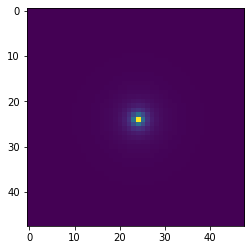

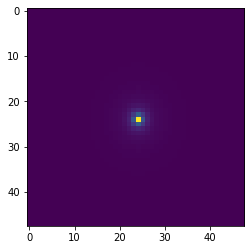

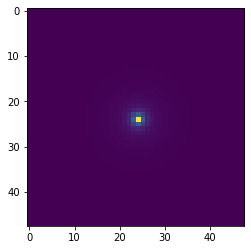

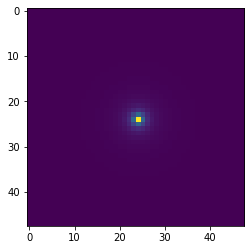

In [8]:
import matplotlib.pyplot as plt
plt.imshow(kappa1[1])
plt.show()
plt.imshow(kappa2[1])
plt.show()
plt.imshow(kappa3[1])
plt.show()
plt.imshow(kappa4[1])
plt.show()

In [9]:
from astropy.io import  fits
real = fits.getdata('z5aoc70_shear_real.fits')
imag = fits.getdata('z5aoc70_shear_imag.fits')

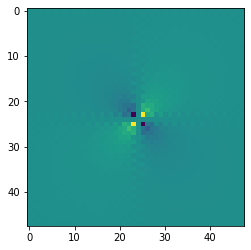

In [10]:
import matplotlib.pyplot as plt
plt.imshow(shear2[3].imag)

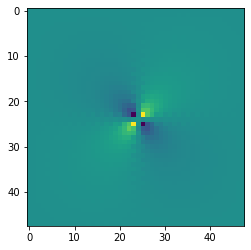

In [11]:
plt.imshow(imag[3]-shear2[3].imag)

In [12]:
# #z = np.array([0.05,0.36,0.47,0.56,0.69,0.80,0.91,1.03,1.22,1.50,2.50])
# plt.plot(halo1.lensKernel(z)*M_200_1,label='14.8,0.1975')
# plt.plot(halo2.lensKernel(z)*M_200_1,label='14.8,0.2425')
# plt.plot(halo3.lensKernel(z)*10**14.8,label='14.9,0.3325')
# #plt.plot(halo4.lensKernel(z)*10**14.9,label='14.9.0.3325')
# # plt.axvline(0.2425)
# plt.legend()

In [13]:
# plt.plot(halo2.lensKernel(z))
#del darkmapper

In [14]:
s = time.time()
nstep = 4000
dmapper =   darkmapper(parser,shear2.real, shear2.imag, gErr,lensKer1)

dmapper.lbd=lbd      # Lasso penalty. was 8
dmapper.lcd=0.      # Ridge penalty in Elastic net
dmapper.nonNeg=True # using non-negative Lasso
dmapper.clean_outcomes()
dmapper.fista_gradient_descent_fast(nstep) # run nsteps
w   =   dmapper.adaptive_lasso_weight(gamma=2.) # determine the apaptive weight
dmapper.fista_gradient_descent(nstep,w=w)   
e = time.time()# run adaptive lasso
print(e-s)

preparing numerical frames!!!!


NameError: name 'lbd' is not defined

In [ ]:
s = time.time()
dmapper.mu=3e-3     # step size for gradient descent
for _ in range(3):  # redo apaptive lasso, letting it run for more iteration
    w   =   dmapper.adaptive_lasso_weight(gamma=2.)
    dmapper.fista_gradient_descent_fast(nstep,w=w)
dmapper.reconstruct()
e = time.time()
print(e-s)

In [65]:
Grid.zlcgrid

array([0.0625, 0.1075, 0.1525, 0.1975, 0.2425, 0.2875, 0.3325, 0.3775,
       0.4225, 0.4675])

In [68]:
c1  =   detect.local_maxima_3D(dmapper.deltaR)
print(c1)
logm_est1=   np.log10((dmapper.alphaR*dmapper._w)[4,0,24,24])+14. # first halo
#logm_est2=   np.log10((dmapper.alphaR*dmapper._w)[4,1,48,48])+14. # first halo, different frame
#logm_est2=   np.log10((dmapper.alphaR*dmapper._w)[7,0,24,24])+14. #second halo

(array([[ 4, 24, 24]]), array([31.74326593]))


In [69]:
logm_est1

14.999698734881905

In [16]:
Grid.zlcgrid

array([0.0625, 0.1075, 0.1525, 0.1975, 0.2425, 0.2875, 0.3325, 0.3775,
       0.4225, 0.4675])

it worked i guess

In [17]:
print("mass 1:", logm_est1)
#print("mass 2:", logm_est2)
print("true mass 1:", log_m1)
print("true mass 2:", log_m2)
#when c=4, the result only agrees to unit digit

mass 1: 14.927186633886318
true mass 1: 14.9
true mass 2: 14.9


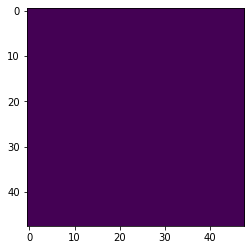

In [18]:
plt.imshow(dmapper.alphaR[5,0])

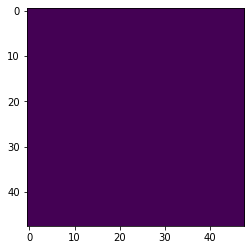

In [19]:
plt.imshow(dmapper.deltaR[5])

In [20]:
np.max(dmapper.deltaR)

5.381960140146092

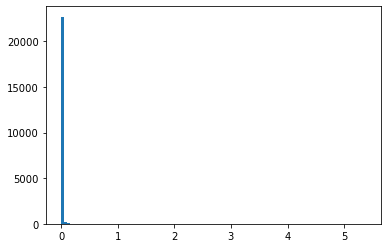

In [21]:
plt.hist(np.ravel(dmapper.deltaR),bins=100)
plt.show()

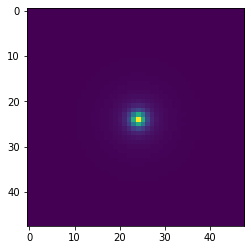

In [22]:
plt.imshow(np.fft.fftshift(np.fft.fft2(dmapper.modelDict.fouaframesInter[9,0]).real))

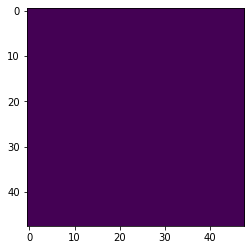

In [23]:
import matplotlib.pyplot as plt
plt.imshow(dmapper.deltaR[4])

(10, 1, 48, 48)


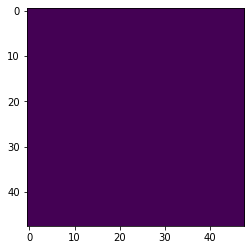

In [24]:
print(dmapper.alphaR.shape)
plt.imshow(dmapper.alphaR[5,0])

In [25]:
print(np.max(dmapper.diff))

1.0277352458020784e-09


In [3]:
np.linspace(2,2,1)

array([2.])

In [ ]:
['CUSPY_150_0.fits', 15.0, 4, 'Apr19_cuspy_150_2_0', 'cuspy', 7, 9, 0, False, 1]